In [1]:
import pandas as pd

df = pd.read_csv('cinema.csv')
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [2]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [4]:
df2 = df.fillna(df.mean())

df2.isnull().any(axis = 0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<Axes: xlabel='SNS2', ylabel='sales'>

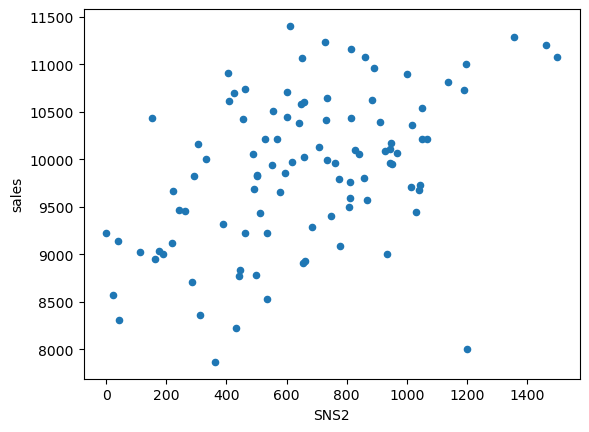

In [5]:
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales') # 散布図の作成

<Axes: xlabel='actor', ylabel='sales'>

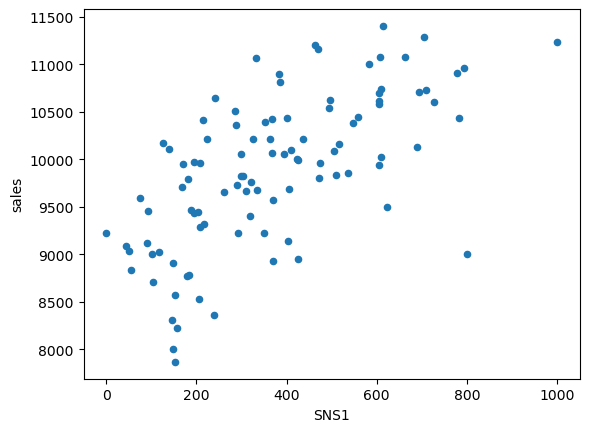

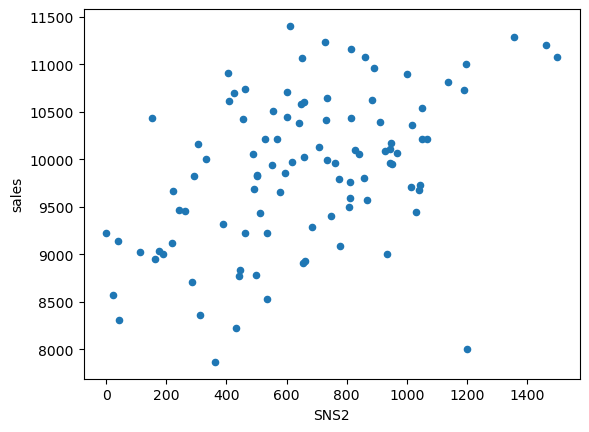

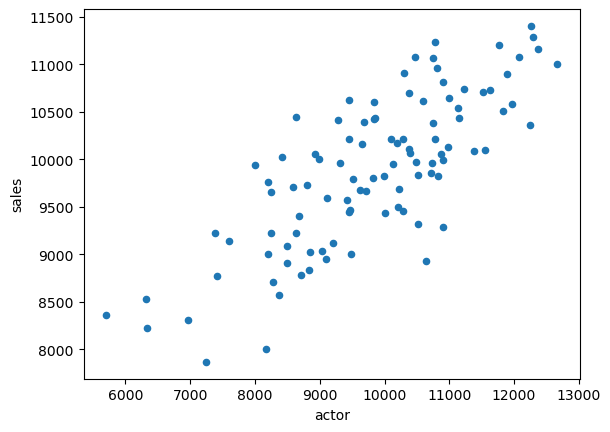

In [6]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales') # 散布図の作成
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales') # 散布図の作成
df2.plot(kind = 'scatter', x = 'actor', y = 'sales') # 散布図の作成

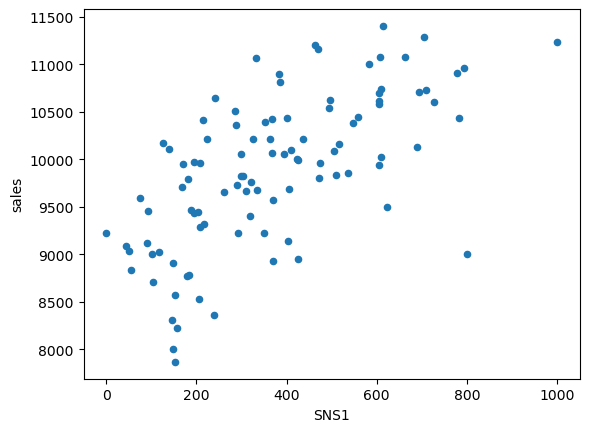

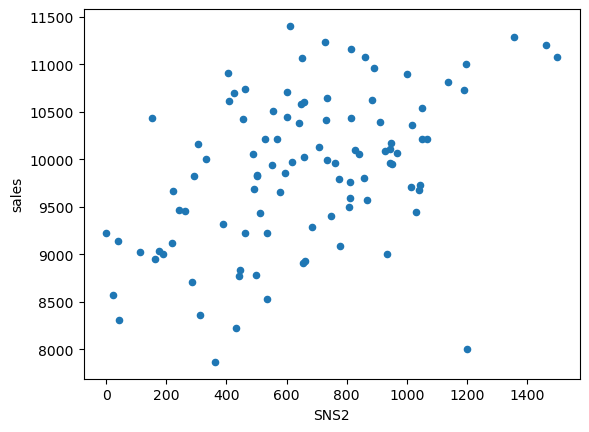

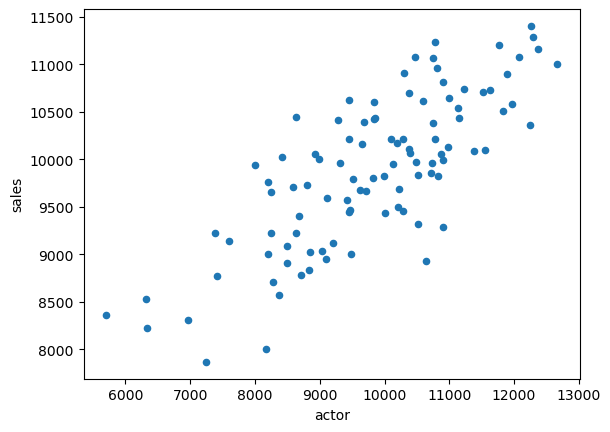

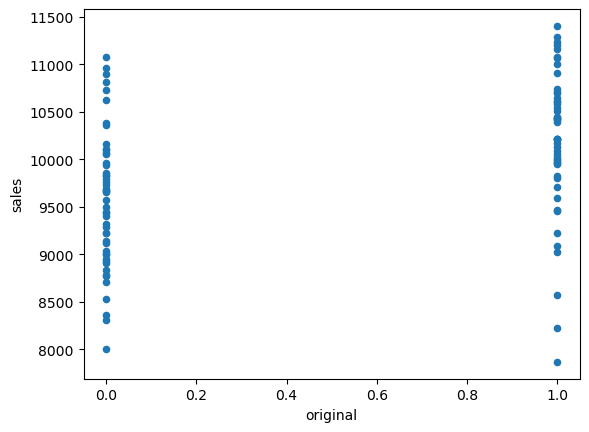

In [7]:
for name in df2.columns:
    if name == 'cinema_id' or name == 'sales':
        continue
    
    df2.plot(kind = 'scatter', x = name, y = 'sales') # 散布図の作成

In [8]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index

df3 = df2.drop(no, axis = 0) # 外れ値の削除

In [9]:
test = pd.DataFrame(
{
    'Acolumn' : [1, 2, 3],
    'Bcolumn' : [4, 5, 6]
}
)

In [10]:
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


In [11]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [12]:
df[(df['SNS2'] > 1000) & (df['sales'] < 8500)] # ２つの条件で外れ値の行を特定する

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [13]:
no = df2[(df['SNS2'] > 1000) & (df['sales'] < 8500)].index # 特定した行からインデックスのみを取り出す

no

Int64Index([30], dtype='int64')

In [14]:
test.drop(0, axis = 0)　# 行を削除

,Acolumn,Bcolumn
1,2,5
2,3,6


In [15]:
test.drop('Bcolumn', axis = 1) # 列を削除

,Acolumn
0,1
1,2
2,3


In [16]:
df3 = df2.drop(no, axis = 0) # 外れ値を削除

df3.shape

(99, 6)

In [17]:
col = ['SNS1', 'SNS2', 'actor', 'original']
x = df3[col] # 特徴量の取り出し

t = df3['sales'] # 正解データの取り出し

In [18]:
df3.loc[2, 'SNS1']

158.0

In [20]:
index = [2, 4, 6]
col = ['SNS1', 'actor']

df3.loc[index, col] # 特定の行と列の取り出し

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [21]:
sample = [10, 20, 30, 40]
sample[1:3] #添字が1以上3未満

[20, 30]

In [22]:
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [24]:
x = df3.loc[:, 'SNS1':'original'] # 特徴量の取り出し
t = df3['sales'] # 正解ラベルの取り出し

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
new = [[150, 700, 300, 0]]
model.predict(new)

/Users/kawanodaiya/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
pred = model.predict(x_test)

#平均絶対誤差の計算
mean_absolute_error(y_pred = pred, y_true = y_test)

277.1223696408626

In [35]:
model.score(x_test, y_test)

0.7903881596570091

In [36]:
import pickle

with open('cinema.pkl', 'wb') as f:
    pickle.dump(model, f)

In [37]:
print(model.coef_) # 計算式の係数を表示
print(model.intercept_) # 計算式の切片の表示

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438705


In [38]:
tmp = pd.DataFrame(model.coef_) # データフレームの作成
tmp.index = x_train.columns # 列名をインデックスに指定
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


In [39]:
df = pd.read_csv('ex3.csv')
df.head(3)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904


In [40]:
df.isnull().sum()

x0        2
x1        0
x2        2
x3        0
target    0
dtype: int64

In [41]:
df2 = df.fillna(df.median())

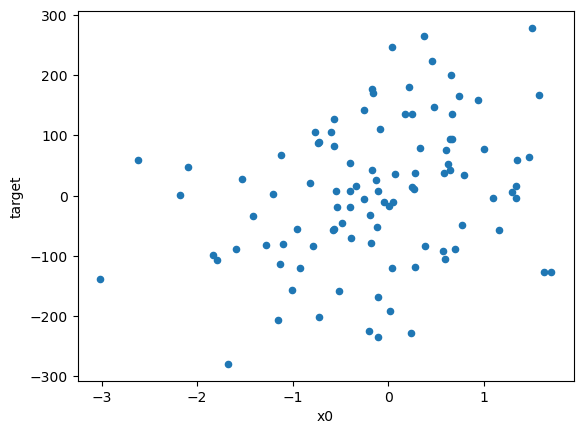

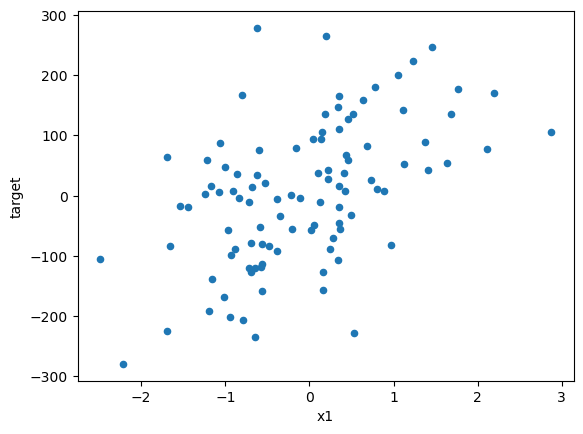

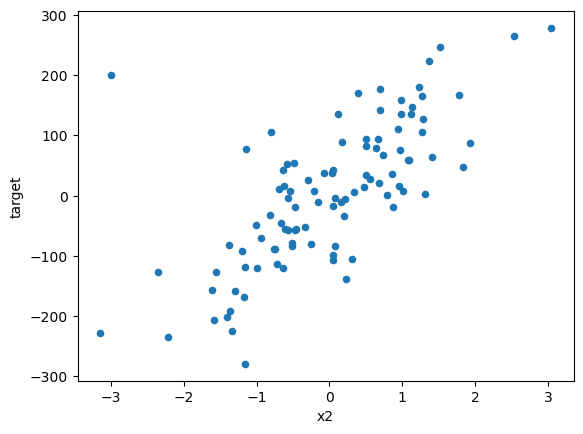

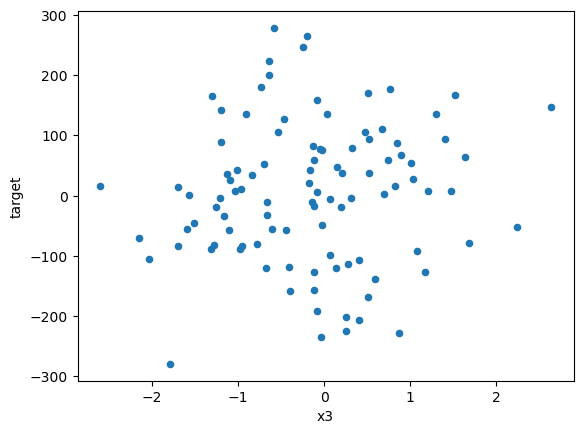

In [43]:
for name in df2.columns:
    if name == 'x' or name == 'target':
        continue
    
    df2.plot(kind = 'scatter', x = name, y = 'target') # 散布図の作成

In [44]:
no = df2[(df2['x2'] < -2) & (df2['target'] > 100)].index

df3 = df2.drop(no, axis = 0) # 外れ値の削除

In [47]:
col = ['x0', 'x1', 'x2', 'x3']
x = df3.loc[: , 'x0':'x3'] # 特徴量の取り出し

t = df3['target'] # 正解データの取り出し

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)